In [1]:
!pip3 install qiskit

  Using cached qiskit-0.21.0.tar.gz (4.1 kB)
  Using cached qiskit_ibmq_provider-0.9.0-py3-none-any.whl (170 kB)
  Using cached qiskit_ignis-0.4.0-py3-none-any.whl (172 kB)
  Using cached qiskit_aqua-0.7.5-py3-none-any.whl (1.9 MB)
  Using cached dill-0.3.2.zip (177 kB)
  Using cached fastjsonschema-2.14.5-py3-none-any.whl (21 kB)
  Using cached python-constraint-1.4.0.tar.bz2 (18 kB)
  Using cached pybind11-2.5.0-py2.py3-none-any.whl (296 kB)
  Using cached requests_ntlm-1.1.0-py2.py3-none-any.whl (5.7 kB)
  Using cached nest_asyncio-1.4.0-py3-none-any.whl (5.2 kB)
  Using cached fastdtw-0.3.4.tar.gz (133 kB)
  Using cached dlx-1.0.4.tar.gz (5.5 kB)
  Using cached yfinance-0.1.54.tar.gz (19 kB)
  Using cached docplex-2.15.194.tar.gz (582 kB)
  Using cached Quandl-3.5.2-py2.py3-none-any.whl (25 kB)
  Using cached ntlm_auth-1.5.0-py2.py3-none-any.whl (29 kB)
  Using cached multitasking-0.0.9.tar.gz (8.1 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)
  Created wheel fo

In [3]:
import qiskit as qk
from qiskit import IBMQ,Aer

In [6]:
with open('Qconfig_IBMQ_experience.py', 'r') as token_file:
    token = token_file.read()
qk.IBMQ.save_account(token, overwrite = True)
qk.IBMQ.load_account()


C:\ProgramData\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [9]:
real_backend = qk.providers.ibmq.least_busy(devices)
print(real_backend.configuration().n_qubits)

NameError: name 'devices' is not defined

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

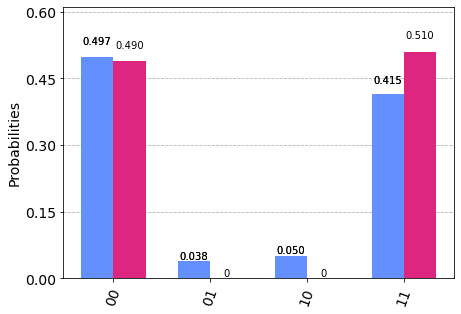

In [15]:
backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute(circuit,backend=backend,shots=1024)
resultSim=jobIBM.result()

backend  = my_provider.get_backend('ibmq_ourense')
jobIBM=qk.execute(circuit,backend=backend,shots=1024)
resultExp=jobIBM.result()

from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExp.get_counts(circuit),resultSim.get_counts(circuit)])